## Can you cluster these datasets correctly ?

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as sch
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

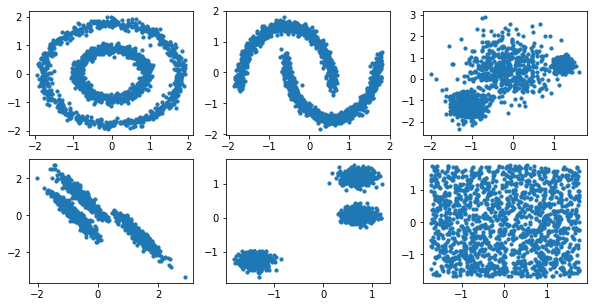

In [81]:
datasets = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]
fig, axes = plt.subplots(2, 3, figsize=(10, 5))
axes = axes.flatten()
for index, dataset in enumerate(datasets):
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    axes[index].scatter(X[:, 0], X[:, 1], s=10)    
    

## cluster these datasets

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import estimate_bandwidth, MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
%matplotlib inline

## Kmeans

### Ward

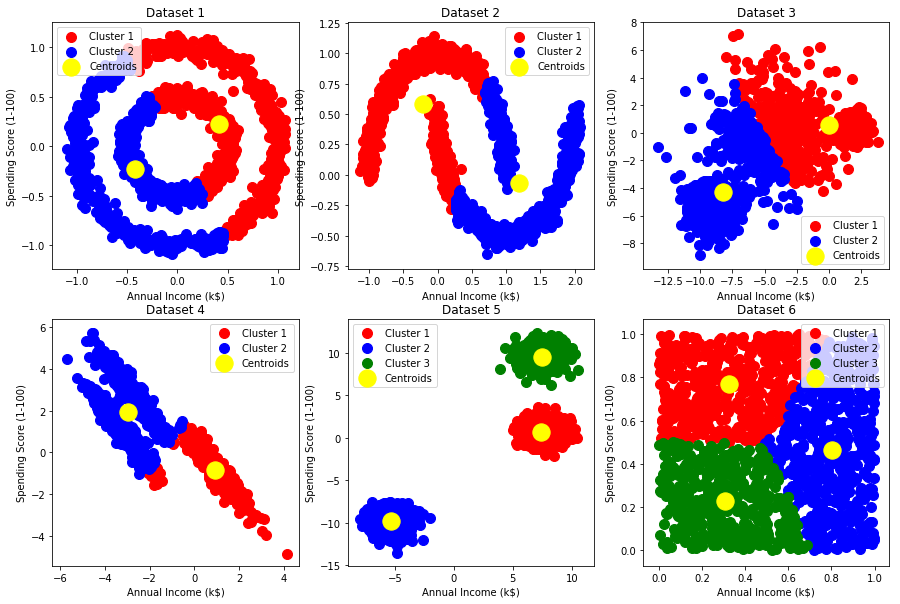

In [265]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans_predictions = kmeans.fit_predict(datasets[0][0])
axes[0].scatter(datasets[0][0][kmeans_predictions == 0, 0], datasets[0][0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[0].scatter(datasets[0][0][kmeans_predictions == 1, 0], datasets[0][0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
axes[0].set_title('Dataset 1')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()


kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans_predictions = kmeans.fit_predict(datasets[1][0])
axes[1].scatter(datasets[1][0][kmeans_predictions == 0, 0], datasets[1][0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[1].scatter(datasets[1][0][kmeans_predictions == 1, 0], datasets[1][0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
axes[1].set_title('Dataset 2')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()

    
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans_predictions = kmeans.fit_predict(datasets[2][0])
axes[2].scatter(datasets[2][0][kmeans_predictions == 0, 0], datasets[2][0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[2].scatter(datasets[2][0][kmeans_predictions == 1, 0], datasets[2][0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
axes[2].set_title('Dataset 3')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].legend()

    
kmeans = KMeans(n_clusters = 2, random_state = 0)
kmeans_predictions = kmeans.fit_predict(datasets[3][0])    
axes[3].scatter(datasets[3][0][kmeans_predictions == 0, 0], datasets[3][0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[3].scatter(datasets[3][0][kmeans_predictions == 1, 0], datasets[3][0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[3].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
axes[3].set_title('Dataset 4')
axes[3].set_xlabel('Annual Income (k$)')
axes[3].set_ylabel('Spending Score (1-100)')
axes[3].legend()

    
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans_predictions = kmeans.fit_predict(datasets[4][0])
axes[4].scatter(datasets[4][0][kmeans_predictions == 0, 0], datasets[4][0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[4].scatter(datasets[4][0][kmeans_predictions == 1, 0], datasets[4][0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[4].scatter(datasets[4][0][kmeans_predictions == 2, 0], datasets[4][0][kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
axes[4].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
axes[4].set_title('Dataset 5')
axes[4].set_xlabel('Annual Income (k$)')
axes[4].set_ylabel('Spending Score (1-100)')
axes[4].legend()


kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans_predictions = kmeans.fit_predict(datasets[5][0])
axes[5].scatter(datasets[5][0][kmeans_predictions == 0, 0], datasets[5][0][kmeans_predictions == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[5].scatter(datasets[5][0][kmeans_predictions == 1, 0], datasets[5][0][kmeans_predictions == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[5].scatter(datasets[5][0][kmeans_predictions == 2, 0], datasets[5][0][kmeans_predictions == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
axes[5].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, -1], s = 300, c = 'yellow', label = 'Centroids')
axes[5].set_title('Dataset 6')
axes[5].set_xlabel('Annual Income (k$)')
axes[5].set_ylabel('Spending Score (1-100)')
axes[5].legend()
plt.show()

## Hirarichal clustring

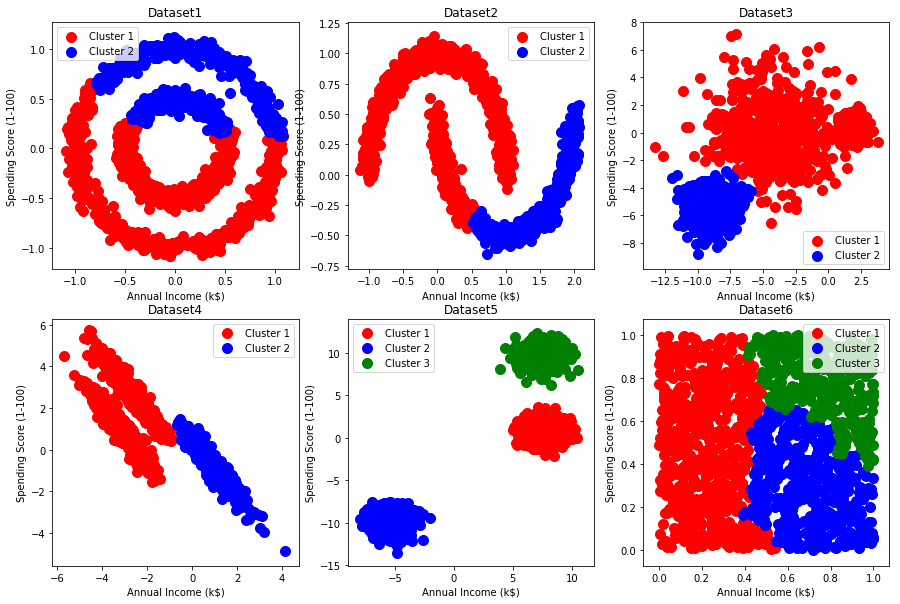

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

hc = AgglomerativeClustering(n_clusters = 2)
y_hc = hc.fit_predict(datasets[0][0])
axes[0].scatter(datasets[0][0][y_hc == 0, 0], datasets[0][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[0].scatter(datasets[0][0][y_hc == 1, 0], datasets[0][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[0].set_title('Dataset1')
axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()

hc = AgglomerativeClustering(n_clusters = 2)
y_hc = hc.fit_predict(datasets[1][0])
axes[1].scatter(datasets[1][0][y_hc == 0, 0], datasets[1][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[1].scatter(datasets[1][0][y_hc == 1, 0], datasets[1][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[1].set_title('Dataset2')
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()

hc = AgglomerativeClustering(n_clusters = 2)
y_hc = hc.fit_predict(datasets[2][0])
axes[2].scatter(datasets[2][0][y_hc == 0, 0], datasets[2][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[2].scatter(datasets[2][0][y_hc == 1, 0], datasets[2][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[2].set_title('Dataset3')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].legend()

hc = AgglomerativeClustering(n_clusters = 2)
y_hc = hc.fit_predict(datasets[3][0])
axes[3].scatter(datasets[3][0][y_hc == 0, 0], datasets[3][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[3].scatter(datasets[3][0][y_hc == 1, 0], datasets[3][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[3].set_title('Dataset4')
axes[3].set_xlabel('Annual Income (k$)')
axes[3].set_ylabel('Spending Score (1-100)')
axes[3].legend()

hc = AgglomerativeClustering(n_clusters = 3)
y_hc = hc.fit_predict(datasets[4][0])
axes[4].scatter(datasets[4][0][y_hc == 0, 0], datasets[4][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[4].scatter(datasets[4][0][y_hc == 1, 0], datasets[4][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[4].scatter(datasets[4][0][y_hc == 2, 0], datasets[4][0][y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
axes[4].set_title('Dataset5')
axes[4].set_xlabel('Annual Income (k$)')
axes[4].set_ylabel('Spending Score (1-100)')
axes[4].legend()

hc = AgglomerativeClustering(n_clusters = 3)
y_hc = hc.fit_predict(datasets[5][0])
axes[5].scatter(datasets[5][0][y_hc == 0, 0], datasets[5][0][y_hc == 0, -1], s = 100, c = 'red', label = 'Cluster 1')
axes[5].scatter(datasets[5][0][y_hc == 1, 0], datasets[5][0][y_hc == 1, -1], s = 100, c = 'blue', label = 'Cluster 2')
axes[5].scatter(datasets[5][0][y_hc == 2, 0], datasets[5][0][y_hc == 2, -1], s = 100, c = 'green', label = 'Cluster 3')
axes[5].set_title('Dataset6')
axes[5].set_xlabel('Annual Income (k$)')
axes[5].set_ylabel('Spending Score (1-100)')
axes[5].legend()

plt.show()

## Birch

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\cluster\birch.py:629: UserWarning: Number of subclusters found (1) by Birch is less than (3). Decrease the threshold.
  % (len(centroids), self.n_clusters))


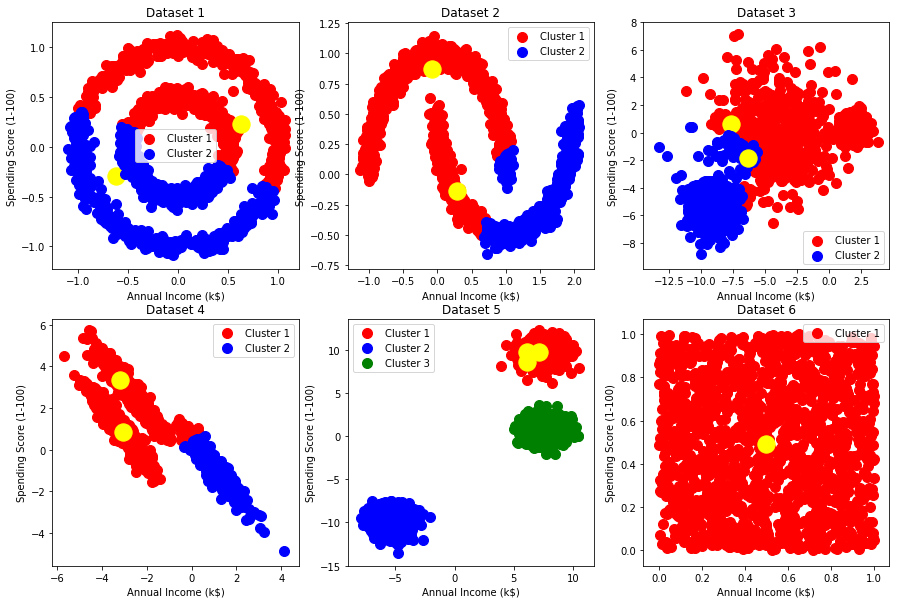

In [160]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

colors_ = ['red', 'blue']
birch_model = Birch(n_clusters=2)
birch_model.fit_predict(datasets[0][0])
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size


for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    axes[0].scatter(datasets[0][0][mask, 0], datasets[0][0][mask, -1], s = 100, c = col, label = 'Cluster '+str(k+1))
    axes[0].scatter(this_centroid[0], this_centroid[1],c='yellow', s=300)

axes[0].set_xlabel('Annual Income (k$)')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].legend()
axes[0].set_title('Dataset 1');

colors_ = ['red', 'blue']
birch_model = Birch(n_clusters=2)
birch_model.fit_predict(datasets[1][0])
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size


for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    axes[1].scatter(datasets[1][0][mask, 0], datasets[1][0][mask, -1], s = 100, c = col, label = 'Cluster '+str(k+1))
    axes[1].scatter(this_centroid[0], this_centroid[1],c='yellow', s=300)

axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].legend()
axes[1].set_title('Dataset 2');

colors_ = ['red', 'blue']
birch_model = Birch(n_clusters=2)
birch_model.fit_predict(datasets[2][0])
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size


for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    axes[2].scatter(datasets[2][0][mask, 0], datasets[2][0][mask, -1], s = 100, c = col, label = 'Cluster '+str(k+1))
    axes[2].scatter(this_centroid[0], this_centroid[1],c='yellow', s=300)

axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')
axes[2].legend()
axes[2].set_title('Dataset 3');

colors_ = ['red', 'blue']
birch_model = Birch(n_clusters=2)
birch_model.fit_predict(datasets[3][0])
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size


for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    axes[3].scatter(datasets[3][0][mask, 0], datasets[3][0][mask, -1], s = 100, c = col, label = 'Cluster '+str(k+1))
    axes[3].scatter(this_centroid[0], this_centroid[1],c='yellow', s=300)

axes[3].set_xlabel('Annual Income (k$)')
axes[3].set_ylabel('Spending Score (1-100)')
axes[3].legend()
axes[3].set_title('Dataset 4');

colors_ = ['red', 'blue', 'green']
birch_model = Birch(n_clusters=3)
birch_model.fit_predict(datasets[4][0])
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size


for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    axes[4].scatter(datasets[4][0][mask, 0], datasets[4][0][mask, -1], s = 100, c = col, label = 'Cluster '+str(k+1))
    axes[4].scatter(this_centroid[0], this_centroid[1],c='yellow', s=300)

axes[4].set_xlabel('Annual Income (k$)')
axes[4].set_ylabel('Spending Score (1-100)')
axes[4].legend()
axes[4].set_title('Dataset 5');

colors_ = ['red', 'blue', 'green']
birch_model = Birch(n_clusters=3)
birch_model.fit_predict(datasets[5][0])
labels = birch_model.labels_
centroids = birch_model.subcluster_centers_
n_clusters = np.unique(labels).size


for this_centroid, k, col in zip(centroids, range(n_clusters), colors_):
    mask = labels == k
    axes[5].scatter(datasets[5][0][mask, 0], datasets[5][0][mask, -1], s = 100, c = col, label = 'Cluster '+str(k+1))
    axes[5].scatter(this_centroid[0], this_centroid[1],c='yellow', s=300)

axes[5].set_xlabel('Annual Income (k$)')
axes[5].set_ylabel('Spending Score (1-100)')
axes[5].legend()
axes[5].set_title('Dataset 6');

## Spectral Clustering

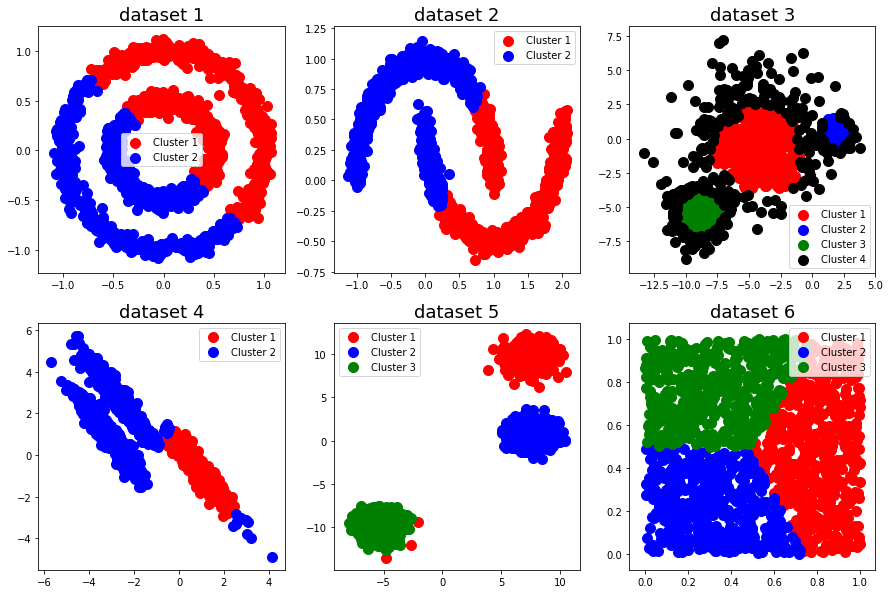

In [255]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
sbc = SpectralClustering(n_clusters=2)
y_pred = sbc.fit_predict(datasets[0][0])
axes[0].set_title('dataset 1', size=18)
axes[0].scatter(datasets[0][0][y_pred == 0, 0], datasets[0][0][y_pred == 0, -1], s=100, color='red', label='Cluster 1');
axes[0].scatter(datasets[0][0][y_pred == 1, 0], datasets[0][0][y_pred == 1, -1], s=100, color='blue', label='Cluster 2');
axes[0].legend();

sbc = SpectralClustering(n_clusters=2)
y_pred = sbc.fit_predict(datasets[1][0])
axes[1].set_title('dataset 2', size=18)
axes[1].scatter(datasets[1][0][y_pred == 0, 0], datasets[1][0][y_pred == 0, -1], s=100, color='red', label='Cluster 1');
axes[1].scatter(datasets[1][0][y_pred == 1, 0], datasets[1][0][y_pred == 1, -1], s=100, color='blue', label='Cluster 2');
axes[1].legend();

sbc = SpectralClustering(n_clusters=4)
y_pred = sbc.fit_predict(datasets[2][0])
axes[2].set_title('dataset 3', size=18)
axes[2].scatter(datasets[2][0][y_pred == 0, 0], datasets[2][0][y_pred == 0, -1], s=100, color='red', label='Cluster 1');
axes[2].scatter(datasets[2][0][y_pred == 1, 0], datasets[2][0][y_pred == 1, -1], s=100, color='blue', label='Cluster 2');
axes[2].scatter(datasets[2][0][y_pred == 2, 0], datasets[2][0][y_pred == 2, -1], s=100, color='green', label='Cluster 3');
axes[2].scatter(datasets[2][0][y_pred == 3, 0], datasets[2][0][y_pred == 3, -1], s=100, color='black', label='Cluster 4');
axes[2].legend();

sbc = SpectralClustering(n_clusters=2)
y_pred = sbc.fit_predict(datasets[3][0])
axes[3].set_title('dataset 4', size=18)
axes[3].scatter(datasets[3][0][y_pred == 0, 0], datasets[3][0][y_pred == 0, -1], s=100, color='red', label='Cluster 1');
axes[3].scatter(datasets[3][0][y_pred == 1, 0], datasets[3][0][y_pred == 1, -1], s=100, color='blue', label='Cluster 2');
axes[3].legend();

sbc = SpectralClustering(n_clusters=3)
y_pred = sbc.fit_predict(datasets[4][0])
axes[4].set_title('dataset 5', size=18)
axes[4].scatter(datasets[4][0][y_pred == 0, 0], datasets[4][0][y_pred == 0, -1], s=100, color='red', label='Cluster 1');
axes[4].scatter(datasets[4][0][y_pred == 1, 0], datasets[4][0][y_pred == 1, -1], s=100, color='blue', label='Cluster 2');
axes[4].scatter(datasets[4][0][y_pred == 2, 0], datasets[4][0][y_pred == 2, -1], s=100, color='green', label='Cluster 3');
axes[4].legend();

sbc = SpectralClustering(n_clusters=3)
y_pred = sbc.fit_predict(datasets[5][0])
axes[5].set_title('dataset 6', size=18)
axes[5].scatter(datasets[5][0][y_pred == 0, 0], datasets[5][0][y_pred == 0, -1], s=100, color='red', label='Cluster 1');
axes[5].scatter(datasets[5][0][y_pred == 1, 0], datasets[5][0][y_pred == 1, -1], s=100, color='blue', label='Cluster 2');
axes[5].scatter(datasets[5][0][y_pred == 2, 0], datasets[5][0][y_pred == 2, -1], s=100, color='green', label='Cluster 3');
axes[5].legend();

## MiniBatchKMeans

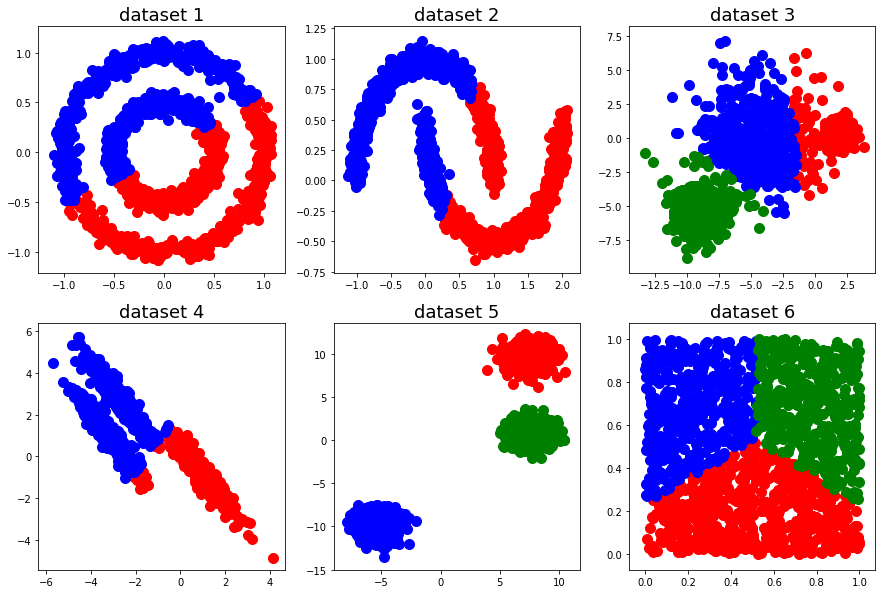

In [254]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()
mkm = MiniBatchKMeans(n_clusters=2)
y_pred = mkm.fit_predict(datasets[0][0])
axes[0].set_title('dataset 1', size=18)
axes[0].scatter(datasets[0][0][y_pred== 0 , 0], datasets[0][0][y_pred == 0, -1], s=100, color='red');
axes[0].scatter(datasets[0][0][y_pred == 1, 0], datasets[0][0][y_pred == 1, -1], s=100, color='blue');

mkm = MiniBatchKMeans(n_clusters=2)
y_pred = mkm.fit_predict(datasets[1][0])
axes[1].set_title('dataset 2', size=18)
axes[1].scatter(datasets[1][0][y_pred== 0 , 0], datasets[1][0][y_pred == 0, -1], s=100, color='red');
axes[1].scatter(datasets[1][0][y_pred == 1, 0], datasets[1][0][y_pred == 1, -1], s=100, color='blue');

mkm = MiniBatchKMeans(n_clusters=3)
y_pred = mkm.fit_predict(datasets[2][0])
axes[2].set_title('dataset 3', size=18)
axes[2].scatter(datasets[2][0][y_pred== 0 , 0], datasets[2][0][y_pred == 0, -1], s=100, color='red');
axes[2].scatter(datasets[2][0][y_pred == 1, 0], datasets[2][0][y_pred == 1, -1], s=100, color='blue');
axes[2].scatter(datasets[2][0][y_pred == 2, 0], datasets[2][0][y_pred == 2, -1], s=100, color='green');

mkm = MiniBatchKMeans(n_clusters=2)
y_pred = mkm.fit_predict(datasets[3][0])
axes[3].set_title('dataset 4', size=18)
axes[3].scatter(datasets[3][0][y_pred== 0 , 0], datasets[3][0][y_pred == 0, -1], s=100, color='red');
axes[3].scatter(datasets[3][0][y_pred == 1, 0], datasets[3][0][y_pred == 1, -1], s=100, color='blue');

mkm = MiniBatchKMeans(n_clusters=3)
y_pred = mkm.fit_predict(datasets[4][0])
axes[4].set_title('dataset 5', size=18)
axes[4].scatter(datasets[4][0][y_pred== 0 , 0], datasets[4][0][y_pred == 0, -1], s=100, color='red');
axes[4].scatter(datasets[4][0][y_pred == 1, 0], datasets[4][0][y_pred == 1, -1], s=100, color='blue');
axes[4].scatter(datasets[4][0][y_pred == 2, 0], datasets[4][0][y_pred == 2, -1], s=100, color='green');

mkm = MiniBatchKMeans(n_clusters=3)
y_pred = mkm.fit_predict(datasets[5][0])
axes[5].set_title('dataset 6', size=18)
axes[5].scatter(datasets[5][0][y_pred== 0 , 0], datasets[5][0][y_pred == 0, -1], s=100, color='red');
axes[5].scatter(datasets[5][0][y_pred == 1, 0], datasets[5][0][y_pred == 1, -1], s=100, color='blue');
axes[5].scatter(datasets[5][0][y_pred == 2, 0], datasets[5][0][y_pred == 2, -1], s=100, color='green');

## GaussianMixture

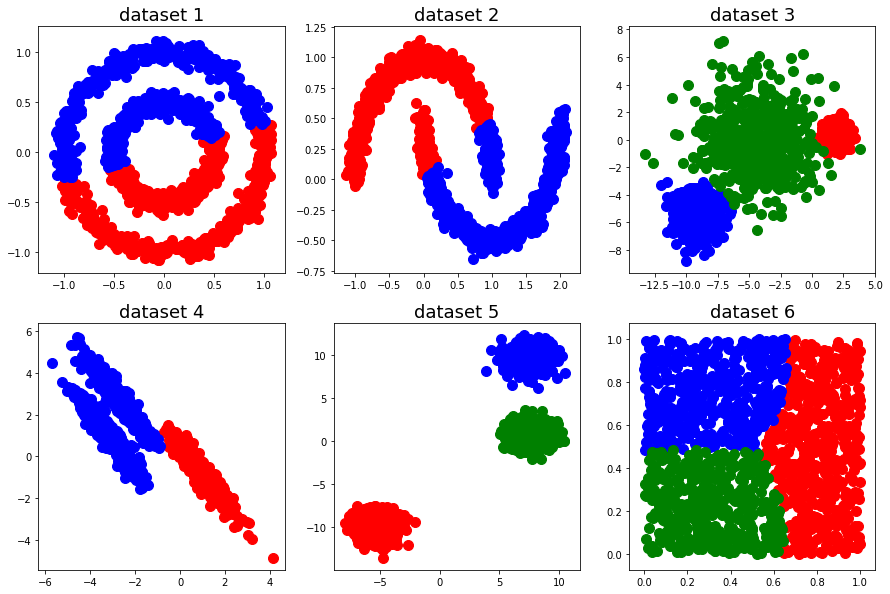

In [261]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

gmm = GaussianMixture(n_components=2)
gmm.fit(datasets[0][0])
y_pred = gmm.predict(datasets[0][0])
axes[0].set_title('dataset 1', size=18)
axes[0].scatter(datasets[0][0][y_pred== 0 , 0], datasets[0][0][y_pred == 0, -1], s=100, color='red');
axes[0].scatter(datasets[0][0][y_pred == 1, 0], datasets[0][0][y_pred == 1, -1], s=100, color='blue');

gmm = GaussianMixture(n_components=2)
gmm.fit(datasets[1][0])
y_pred = gmm.predict(datasets[1][0])
axes[1].set_title('dataset 2', size=18)
axes[1].scatter(datasets[1][0][y_pred== 0 , 0], datasets[1][0][y_pred == 0, -1], s=100, color='red');
axes[1].scatter(datasets[1][0][y_pred == 1, 0], datasets[1][0][y_pred == 1, -1], s=100, color='blue');

gmm = GaussianMixture(n_components=3)
gmm.fit(datasets[2][0])
y_pred = gmm.predict(datasets[2][0])
axes[2].set_title('dataset 3', size=18)
axes[2].scatter(datasets[2][0][y_pred== 0 , 0], datasets[2][0][y_pred == 0, -1], s=100, color='red');
axes[2].scatter(datasets[2][0][y_pred == 1, 0], datasets[2][0][y_pred == 1, -1], s=100, color='blue');
axes[2].scatter(datasets[2][0][y_pred == 2, 0], datasets[2][0][y_pred == 2, -1], s=100, color='green');

gmm = GaussianMixture(n_components=2)
gmm.fit(datasets[3][0])
y_pred = gmm.predict(datasets[3][0])
axes[3].set_title('dataset 4', size=18)
axes[3].scatter(datasets[3][0][y_pred== 0 , 0], datasets[3][0][y_pred == 0, -1], s=100, color='red');
axes[3].scatter(datasets[3][0][y_pred == 1, 0], datasets[3][0][y_pred == 1, -1], s=100, color='blue');

gmm = GaussianMixture(n_components=3)
gmm.fit(datasets[4][0])
y_pred = gmm.predict(datasets[4][0])
axes[4].set_title('dataset 5', size=18)
axes[4].scatter(datasets[4][0][y_pred== 0 , 0], datasets[4][0][y_pred == 0, -1], s=100, color='red');
axes[4].scatter(datasets[4][0][y_pred == 1, 0], datasets[4][0][y_pred == 1, -1], s=100, color='blue');
axes[4].scatter(datasets[4][0][y_pred == 2, 0], datasets[4][0][y_pred == 2, -1], s=100, color='green');

gmm = GaussianMixture(n_components=3)
gmm.fit(datasets[5][0])
y_pred = gmm.predict(datasets[5][0])
axes[5].set_title('dataset 6', size=18)
axes[5].scatter(datasets[5][0][y_pred== 0 , 0], datasets[5][0][y_pred == 0, -1], s=100, color='red');
axes[5].scatter(datasets[5][0][y_pred == 1, 0], datasets[5][0][y_pred == 1, -1], s=100, color='blue');
axes[5].scatter(datasets[5][0][y_pred == 2, 0], datasets[5][0][y_pred == 2, -1], s=100, color='green');

## Dendrograms

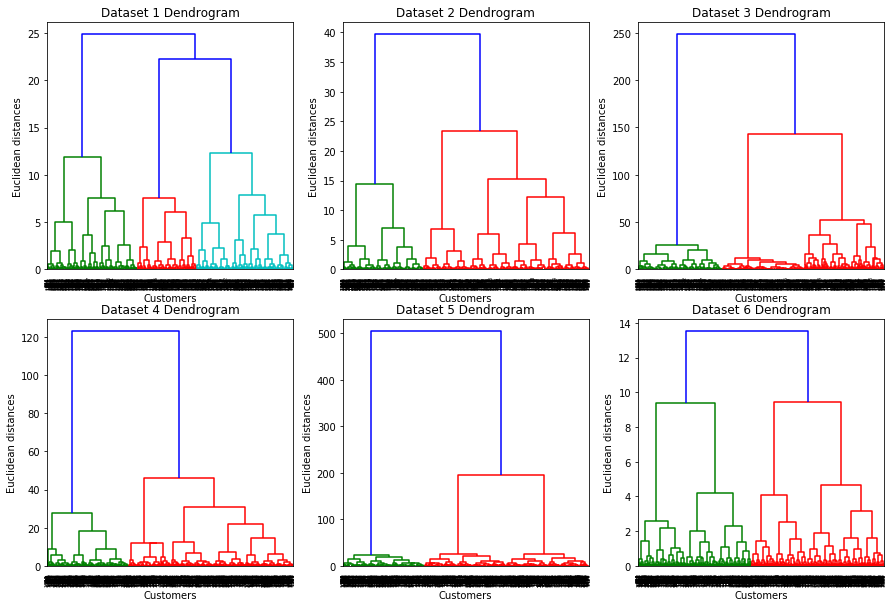

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

dendrogram1 = sch.dendrogram(sch.linkage(datasets[0][0], method = 'ward'), ax =  axes[0])
axes[0].set_title('Dataset 1 Dendrogram')
axes[0].set_xlabel('Customers')
axes[0].set_ylabel('Euclidean distances')

dendrogram2 = sch.dendrogram(sch.linkage(datasets[1][0], method = 'ward'), ax =  axes[1])
axes[1].set_title('Dataset 2 Dendrogram')
axes[1].set_xlabel('Customers')
axes[1].set_ylabel('Euclidean distances')

dendrogram3 = sch.dendrogram(sch.linkage(datasets[2][0], method = 'ward'), ax =  axes[2])
axes[2].set_title('Dataset 3 Dendrogram')
axes[2].set_xlabel('Customers')
axes[2].set_ylabel('Euclidean distances')

dendrogram4 = sch.dendrogram(sch.linkage(datasets[3][0], method = 'ward'), ax =  axes[3])
axes[3].set_title('Dataset 4 Dendrogram')
axes[3].set_xlabel('Customers')
axes[3].set_ylabel('Euclidean distances')

dendrogram5 = sch.dendrogram(sch.linkage(datasets[4][0], method = 'ward'), ax =  axes[4])
axes[4].set_title('Dataset 5 Dendrogram')
axes[4].set_xlabel('Customers')
axes[4].set_ylabel('Euclidean distances')

dendrogram6 = sch.dendrogram(sch.linkage(datasets[5][0], method = 'ward'), ax =  axes[5])
axes[5].set_title('Dataset 6 Dendrogram')
axes[5].set_xlabel('Customers')
axes[5].set_ylabel('Euclidean distances')


plt.show()